# Confidence intervals

**Confidence intervals (CIs)** come from a _confidence procedure_ that defines how many CIs will include the true parameter value $\theta$ if we repeatedly sampled from a population indefinitely. Below, we generate 400 samples of 30 observations from a single normal distribution with known parameters ($\mu = 5$; $\sigma=2.5$). We then estimate the parameters of the sampling distribution using the statistics of the samples. Our confidence procedure begins on `line 26` where we define what proportion of CIs that we want to include the true population parameter. We then use scipy's `stats.norm.ppf()` function to get the critical $z$ values that symmetrically cut off 5% of the probability from the normal distribution with mean of 0 and SD of 1. We then construct the CI by converting these $z$ values into the standard error of the sampling distribution.

Next, we empirically verify that our CIs work as the CI procedure intended. We create a CI for each individual sample mean, then plot it as a horizontal bar centered at the corresponding sample mean. We color CIs that include the population mean green and others red. We also count the number of green bars and print their proportion in the total number of bars.

The CI procedure defines the width of the generated CIs. Broader CIs are less informative because they include more of the uniformly distributed parameter space. Note also, that each individual CI comes from a single experiment, a single random data collection event. An individual CI does not necessarily mean that there is a $X\%$ chance that the true population mean is captured in it, because the **frequentist probability** is defined as a proportion of an occurrence of a random event over multiple repetitions. If we are interested in being right 95% of the time on average, then this CI procedure makes sense. If, however, we are interested in parameter values and precision, we cannot rely on CIs, because CIs do not inform us about those things. As a verification of this reasoning we can think about the fact that given the same confidence coefficient, different CI procedures can give CIs of different sizes. Moreover, sometimes you can be 100% certain that a (e.g. 50%) CI includes the true parameter value (when the likelihood interval is completely nested within a wider arbitrary confidence interval).

The **fundamental confidence fallacy** comes from confusing the term _confidence_ in a frequentist sense with _probability_ in a Bayesian sense (one could argue then that the Bayesian notion of probability is more intuitive). _Confidence_ stems from a frequentist repeated-sampling definition of probability. We can be confident about an outcome of a random event, _before_ it occurs. This confidence expresses our belief about the proportion of an occurrence of that random even had we repeated the experiment multiple times (but we rarely do). After we've sampled our data, the confidence is irrelevant to the actual result, because the result is either positive or negative and there is no more (frequentist) randomness. The distinction between confidence and probability is technical and slight, but confusing the two may lead to contradiction.

If we only care about the outcomes of the decisions based on the results of our experiments, we care about the _error rates_, and confidence intervals correspond to error rates quite well. Again, these error rates are proportions of errors over a repeated number of experiments. I think, in a world where we do not repeat the same experiment multiple number of times, it is difficult to go with frequentists' view of probability.

<IPython.core.display.Javascript object>


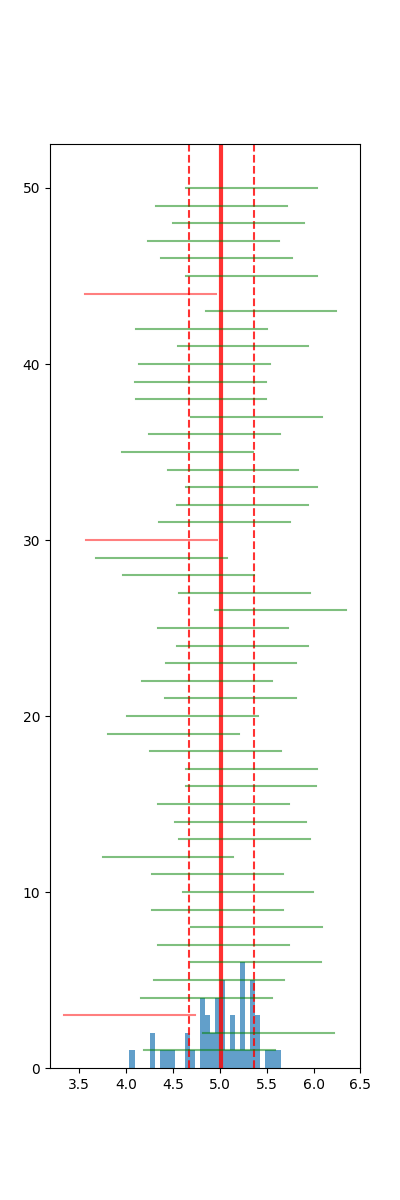

0.94
Type I error =  3 / 50 = 0.06


In [3]:
%matplotlib notebook
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

plt.close()
fig = plt.figure('CIs', figsize=[4, 12])
ax = fig.add_subplot(111)

N = 50 # Sample size
K = 50 # Nnumber of samples

# 400 samples of size N
samples = np.random.normal(5, 2.5, N*K).reshape([K, N])

# Estimate the sampling distribution
x_bars = samples.mean(axis=1)
mu = x_bars.mean()
se = x_bars.std()

# Plot the sampling distribution
ax.hist(x_bars, bins=30, alpha=.7)
ax.axvline(mu, color='red', lw=3, alpha=.8)
ax.axvline(mu+se, color='red', ls='--', lw=1.5, alpha=.8)
ax.axvline(mu-se, color='red', ls='--', lw=1.5, alpha=.8)

# Construct confidence intervals
ci_size = .95
z_crit = stats.norm.ppf(1-(1-ci_size)/2, 0, 1)
t_crit = stats.t.ppf(1-(1-ci_size)/2, df=N, loc=0, scale=1)
ci = t_crit*se

# Plot mean and CI for each sample and color green if it includes the "true" mean
includes = []
for i, sample in enumerate(samples):
    L = x_bars[i]-ci
    U = x_bars[i]+ci
    mean_in_ci = int((mu>L)&(mu<U))
    ax.plot([L, U], [i+1, i+1], color=['red','green'][mean_in_ci], alpha=.5)
    includes.append(mean_in_ci)
    np.random.randint(0, 1, size=None, dtype='l')

# How many CIs include the mean?
print(np.mean(includes))

# What are the type I and type II error rates?
includes = np.array(includes).astype(bool)
decisions = np.random.binomial(size=includes.size, n=1, p=1).astype(bool) # If we are 95% confident that we found a result, we should claim that we did in 95% of the studies

N_pos = np.sum(decisions)
N_false_pos = np.sum(decisions & ~includes)
type1_rate = N_false_pos / N_pos
print('Type I error =  {} / {} = {}'.format(N_false_pos, N_pos, type1_rate))

# N_neg = np.sum(~decisions)
# N_false_neg = np.sum(~decisions & includes)
# type2_rate = N_false_neg / N_neg
# print('Type II error =  {} / {} = {}'.format(N_false_neg, N_neg, type2_rate))


# Credible intervals

Bayesian credible intervals also express our confidence in finding a true parameter, but in a very different way. It is much more subjective. Probability in a Bayesian sense corresponds to the strength in a belief, relative to other beliefs. The probability that some interval contains the true parameter thus corresponds to how sure (or unsure) we are that this interval contains the true parameter. Sounds much more intuitive. The way Bayesian credible intervals (BCIs) are constructed demonstrates why we can interpret it that way. 

We begin with a set of prior beliefs with a known distribution of strengths in the (the prior probability distribution). We then collect the data, assess each of the prior belief's likelihood given the collected data and get an updated posterior distribution (beliefs and their strengths updated by likelihood). The posterior probability in a set of belief (a range of parameter values) is our Bayesian (not frequentist) confidence in that belief after collecting the data. If we take any interval that contains $X\%$ of probability of that posterior distribution, we can say that we are $X\%$ confident that this interval contains the true value of the parameter. 

# Cookie jar example

*** From Keith Weinstein's answer here: https://stats.stackexchange.com/questions/2272/whats-the-difference-between-a-confidence-interval-and-a-credible-interval ***: 

I agree completely with Srikant's explanation. To give a more heuristic spin on it:

Classical approaches generally posit that the world is one way (e.g., a parameter has one particular true value), and try to conduct experiments whose resulting conclusion -- no matter the true value of the parameter -- will be correct with at least some minimum probability.

As a result, to express uncertainty in our knowledge after an experiment, the frequentist approach uses a "confidence interval" -- a range of values designed to include the true value of the parameter with some minimum probability, say 95%. A frequentist will design the experiment and 95% confidence interval procedure so that out of every 100 experiments run start to finish, at least 95 of the resulting confidence intervals will be expected to include the true value of the parameter. The other 5 might be slightly wrong, or they might be complete nonsense -- formally speaking that's ok as far as the approach is concerned, as long as 95 out of 100 inferences are correct. (Of course we would prefer them to be slightly wrong, not total nonsense.)

Bayesian approaches formulate the problem differently. Instead of saying the parameter simply has one (unknown) true value, a Bayesian method says the parameter's value is fixed but has been chosen from some probability distribution -- known as the prior probability distribution. (Another way to say that is that before taking any measurements, the Bayesian assigns a probability distribution, which they call a belief state, on what the true value of the parameter happens to be.) This "prior" might be known (imagine trying to estimate the size of a truck, if we know the overall distribution of truck sizes from the DMV) or it might be an assumption drawn out of thin air. The Bayesian inference is simpler -- we collect some data, and then calculate the probability of different values of the parameter GIVEN the data. This new probability distribution is called the "a posteriori probability" or simply the "posterior." Bayesian approaches can summarize their uncertainty by giving a range of values on the posterior probability distribution that includes 95% of the probability -- this is called a "95% credibility interval."

A Bayesian partisan might criticize the frequentist confidence interval like this: "So what if 95 out of 100 experiments yield a confidence interval that includes the true value? I don't care about 99 experiments I DIDN'T DO; I care about this experiment I DID DO. Your rule allows 5 out of the 100 to be complete nonsense [negative values, impossible values] as long as the other 95 are correct; that's ridiculous."

A frequentist die-hard might criticize the Bayesian credibility interval like this: "So what if 95% of the posterior probability is included in this range? What if the true value is, say, 0.37? If it is, then your method, run start to finish, will be WRONG 75% of the time. Your response is, 'Oh well, that's ok because according to the prior it's very rare that the value is 0.37,' and that may be so, but I want a method that works for ANY possible value of the parameter. I don't care about 99 values of the parameter that IT DOESN'T HAVE; I care about the one true value IT DOES HAVE. Oh also, by the way, your answers are only correct if the prior is correct. If you just pull it out of thin air because it feels right, you can be way off."

In a sense both of these partisans are correct in their criticisms of each others' methods, but I would urge you to think mathematically about the distinction -- as Srikant explains.

----------

Here's an extended example from that talk that shows the difference precisely in a discrete example.

When I was a child my mother used to occasionally surprise me by ordering a jar of chocolate-chip cookies to be delivered by mail. The delivery company stocked four different kinds of cookie jars -- type A, type B, type C, and type D, and they were all on the same truck and you were never sure what type you would get. Each jar had exactly 100 cookies, but the feature that distinguished the different cookie jars was their respective distributions of chocolate chips per cookie. If you reached into a jar and took out a single cookie uniformly at random, these are the probability distributions you would get on the number of chips:

![alt text][1]

A type-A cookie jar, for example, has 70 cookies with two chips each, and no cookies with four chips or more! A type-D cookie jar has 70 cookies with one chip each. Notice how each vertical column is a probability mass function -- the conditional probability of the number of chips you'd get, given that the jar = A, or B, or C, or D, and each column sums to 100.

I used to love to play a game as soon as the deliveryman dropped off my new cookie jar. I'd pull one single cookie at random from the jar, count the chips on the cookie, and try to express my uncertainty -- at the 70% level -- of which jars it could be. Thus it's the identity of the jar (A, B, C or D) that is the **value of the parameter** being estimated. The number of chips (0, 1, 2, 3 or 4) is the **outcome** or the observation or the sample.

Originally I played this game using a frequentist, 70% confidence interval. Such an interval needs to make sure that **no matter** the true value of the parameter, meaning no matter which cookie jar I got, the interval would cover that true value with at least 70% probability.

An interval, of course, is a function that relates an outcome (a row) to a set of values of the parameter (a set of columns). But to *construct* the confidence interval and guarantee 70% coverage, we need to work "vertically" -- looking at each column in turn, and making sure that 70% of the probability mass function is covered so that 70% of the time, that column's identity will be part of the interval that results. Remember that it's the vertical columns that form a p.m.f.

So after doing that procedure, I ended up with these intervals:

![enter image description here][2]

For example, if the number of chips on the cookie I draw is 1, my confidence interval will be {B,C,D}. If the number is 4, my confidence interval will be {B,C}. Notice that since each column sums to 70% or greater, then no matter which column we are truly in (no matter which jar the deliveryman dropped off), the interval resulting from this procedure will include the correct jar with at least 70% probability.

Notice also that the procedure I followed in constructing the intervals had some discretion. In the column for type-B, I could have just as easily made sure that the intervals that included B would be 0,1,2,3 instead of 1,2,3,4. That would have resulted in 75% coverage for type-B jars (12+19+24+20), still meeting the lower bound of 70%.

My sister Bayesia thought this approach was crazy, though. "You have to consider the deliverman as part of the system," she said. "Let's treat the identity of the jar as a random variable itself, and let's *assume* that the deliverman chooses among them uniformly -- meaning he has all four on his truck, and when he gets to our house he picks one at random, each with uniform probability."

"With that assumption, now let's look at the joint probabilities of the whole event -- the jar type **and** the number of chips you draw from your first cookie," she said, drawing the following table:

![enter image description here][3]

Notice that the whole table is now a probability mass function -- meaning the whole table sums to 100%.

"Ok," I said, "where are you headed with this?"

"You've been looking at the conditional probability of the number of chips, given the jar," said Bayesia. "That's all wrong! What you really care about is the conditional probability of which jar it is, given the number of chips on the cookie! Your 70% interval should simply include the list jars that, in total, have 70% probability of being the true jar. Isn't that a lot simpler and more intuitive?"

"Sure, but how do we calculate that?" I asked.

"Let's say we **know** that you got 3 chips. Then we can ignore all the other rows in the table, and simply treat that row as a probability mass function. We'll need to scale up the probabilities proportionately so each row sums to 100, though." She did:

![enter image description here][4]

"Notice how each row is now a p.m.f., and sums to 100%. We've flipped the conditional probability from what you started with -- now it's the probability of the man having dropped off a certain jar, given the number of chips on the first cookie."

"Interesting," I said. "So now we just circle enough jars in each row to get up to 70% probability?" We did just that, making these credibility intervals:

![enter image description here][5]

Each interval includes a set of jars that, *a posteriori*, sum to 70% probability of being the true jar.

"Well, hang on," I said. "I'm not convinced. Let's put the two kinds of intervals side-by-side and compare them for coverage and, assuming that the deliveryman picks each kind of jar with equal probability, credibility."

Here they are:

**Confidence intervals:**

![enter image description here][6]

**Credibility intervals:**

![enter image description here][7]

"See how crazy your confidence intervals are?" said Bayesia. "You don't even have a sensible answer when you draw a cookie with zero chips! You just say it's the empty interval. But that's obviously wrong -- it has to be one of the four types of jars. How can you live with yourself, stating an interval at the end of the day when you **know the interval is wrong?** And ditto when you pull a cookie with 3 chips -- your interval is only correct 41% of the time. Calling this a '70%' confidence interval is bullshit."

"Well, hey," I replied. "It's correct 70% of the time, no matter which jar the deliveryman dropped off. That's a lot more than you can say about your credibility intervals. What if the jar is type B? Then your interval will be wrong 80% of the time, and only correct 20% of the time!"

"This seems like a big problem," I continued, "because your mistakes will be correlated with the type of jar. If you send out 100 'Bayesian' robots to assess what type of jar you have, each robot sampling one cookie, you're telling me that on type-B days, you will expect 80 of the robots to get the wrong answer, each having >73% belief in its incorrect conclusion! That's troublesome, especially if you want most of the robots to agree on the right answer."

"PLUS we had to make this assumption that the deliveryman behaves uniformly and selects each type of jar at random," I said. "Where did that come from? What if it's wrong? You haven't talked to him; you haven't interviewed him. Yet all your statements of *a posteriori* probability rest on this statement about his behavior. I didn't have to make any such assumptions, and my interval meets its criterion even in the worst case."

"It's true that my credibility interval does perform poorly on type-B jars," Bayesia said. "But so what? Type B jars happen only 25% of the time. It's balanced out by my good coverage of type A, C, and D jars. And I never publish nonsense."

"It's true that my confidence interval does perform poorly when I've drawn a cookie with zero chips," I said. "But so what? Chipless cookies happen, at most, 27% of the time in the worst case (a type-D jar). I can afford to give nonsense for this outcome because NO jar will result in a wrong answer more than 30% of the time."

"The column sums matter," I said.

"The row sums matter," Bayesia said.

"I can see we're at an impasse," I said. "We're both correct in the mathematical statements we're making, but we disagree about the appropriate way to quantify uncertainty."

"That's true," said my sister. "Want a cookie?"


  [1]: http://i.stack.imgur.com/2bgvJ.png
  [2]: http://i.stack.imgur.com/OaGoo.png
  [3]: http://i.stack.imgur.com/GR3Vm.png
  [4]: http://i.stack.imgur.com/wvk2j.png
  [5]: http://i.stack.imgur.com/YYdhr.png
  [6]: http://i.stack.imgur.com/p7KuF.png
  [7]: http://i.stack.imgur.com/5gV84.png

In [4]:
xk = np.arange(5)

A_pk = (0.01, 0.01, 0.70, 0.28, 0.00)
A = stats.rv_discrete(name='A', values=(xk, A_pk))

B_pk = (0.12, 0.19, 0.24, 0.20, 0.25)
B = stats.rv_discrete(name='B', values=(xk, B_pk))

C_pk = (0.13, 0.20, 0.00, 0.00, 0.67)
C = stats.rv_discrete(name='C', values=(xk, C_pk))

D_pk = (0.27, 0.70, 0.01, 0.01, 0.01)
D = stats.rv_discrete(name='D', values=(xk, D_pk))

h_space = [A, B, C, D]
prior = stats.rv_discrete(name='prior', values=([0,1,2,3], [1/4, 1/4, 1/4, 1/4]))

K = 1000
CP = {0: 'BC', 1: 'BD', 2: 'AB', 3: 'B', 4: 'C'} # Likelihood-based confidence procedure
CP = {0: 'BD', 1: 'BD', 2: 'A', 3: 'AB', 4: 'C'} # 
hits = []
for i in range(K):
    rand_jar = h_space[prior.rvs(1)-1]
    nb_chips = rand_jar.rvs(1)-1
    CI = CP[nb_chips]
    hits.append(rand_jar.name in CI)

print(sum(hits)/len(hits))


0.784
